# Which brand and model has the highest ownership?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 

In [2]:
#load cleaned data frame from csv
cleaned_ev_file = EV_file = "../Cleaned_Data_Sets/Cleaned_EV_Data.csv"
cleaned_ev_df = pd.read_csv(cleaned_ev_file)
cleaned_ev_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Vehicle Location Longitude,Vehicle Location Latitude
0,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,-120.56916,46.58514
1,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220,-117.16171,32.71568
2,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),22,-123.12802,44.09573
3,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),289,-120.56916,46.58514
4,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),14,-122.18384,47.80310


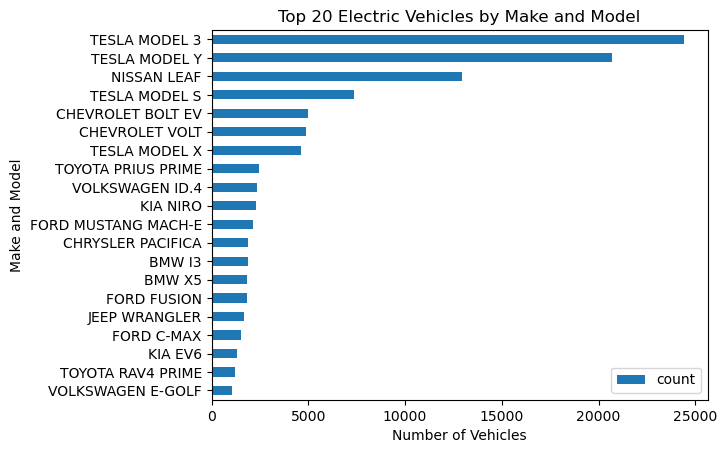

In [3]:
make_model_count = cleaned_ev_df.groupby(['Make', 'Model']).size().reset_index(name='count')
make_model_count['make_model'] = make_model_count.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)
top_make_model = make_model_count.sort_values(by='count', ascending=False).head(20)

ax = top_make_model.plot(kind='barh', x='make_model', y='count')
ax.set_title('Top 20 Electric Vehicles by Make and Model')
ax.set_xlabel('Number of Vehicles')
ax.set_ylabel('Make and Model')
plt.gca().invert_yaxis()
plt.show()

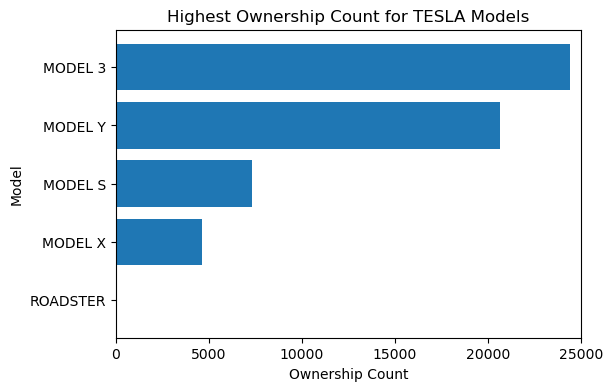

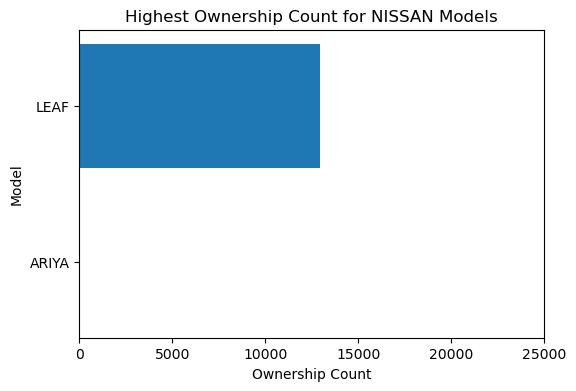

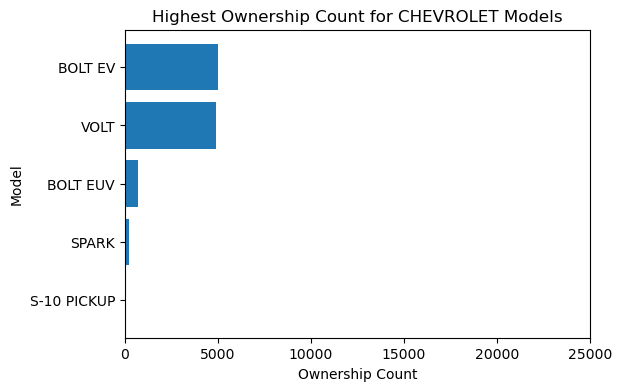

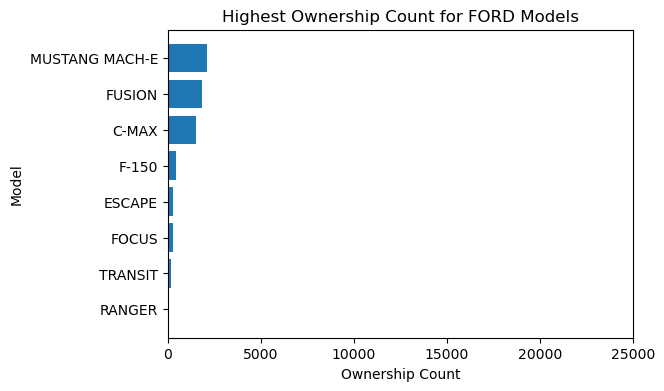

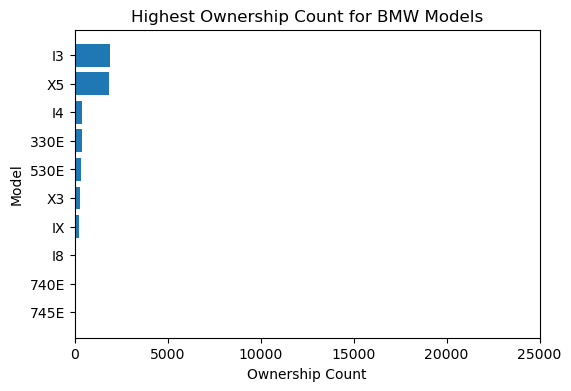

In [4]:
# Get a list of all unique makes in the DataFrame
makes = cleaned_ev_df['Make'].unique()

# Get the top 10 makes by ownership count
make_counts = cleaned_ev_df['Make'].value_counts().nlargest(5)
top_makes = make_counts.index.tolist()

# Loop through each make and create a graph
for make in top_makes:
    make_data = cleaned_ev_df[cleaned_ev_df['Make'] == make].groupby('Model')['Postal Code'].count().reset_index(name='Ownership Count')
    make_data = make_data.nlargest(10, 'Ownership Count')

    # Create the horizontal bar chart
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.barh(y=make_data['Model'], width=make_data['Ownership Count'])

    # Set the x-axis limits
    ax.set_xlim([0, 25000])

    # Set the chart title and axis labels
    ax.set_title(f'Highest Ownership Count for {make} Models')
    ax.set_xlabel('Ownership Count')
    ax.set_ylabel('Model')

    # Show the graph
    plt.gca().invert_yaxis()
    plt.show()




# Ownership count vs electric range

In [5]:
cleaned_ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124687 entries, 0 to 124686
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   County                      124687 non-null  object 
 1   City                        124687 non-null  object 
 2   State                       124687 non-null  object 
 3   Postal Code                 124687 non-null  float64
 4   Model Year                  124687 non-null  int64  
 5   Make                        124687 non-null  object 
 6   Model                       124506 non-null  object 
 7   Electric Vehicle Type       124687 non-null  object 
 8   Electric Range              124687 non-null  int64  
 9   Vehicle Location Longitude  124687 non-null  float64
 10  Vehicle Location Latitude   124687 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 10.5+ MB


The correlation between both factors is 0.26


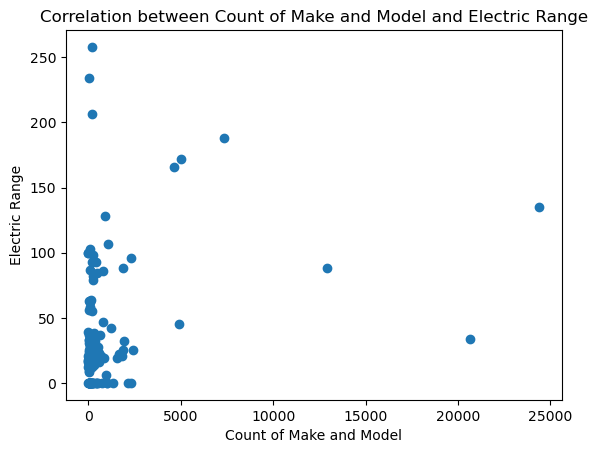

In [6]:
grouped_df = cleaned_ev_df.groupby(['Make', 'Model']).agg({'Electric Range': 'mean', 'Model Year': 'count'}).reset_index()
grouped_df = grouped_df.rename(columns={'Model Year': 'Count'})

correlation =  st.pearsonr(grouped_df['Count'],grouped_df['Electric Range'])

# Plot a scatter plot of Count vs Electric Range
plt.scatter(grouped_df['Count'], grouped_df['Electric Range'])
plt.title('Correlation between Count of Make and Model and Electric Range')
plt.xlabel('Count of Make and Model')
plt.ylabel('Electric Range')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()